In [ ]:
from utils.dataloader import DataLoader
import pandas as pd
from settings.constants import TRAIN_CSV

df = pd.read_csv(TRAIN_CSV, header=0)

X_raw = df.drop('class', axis=1)
loader = DataLoader()
loader.fit(X_raw)

X = loader.load_data()
y = df['class']

c:\Users\Dmytro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Dmytro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Dmytro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is depreca

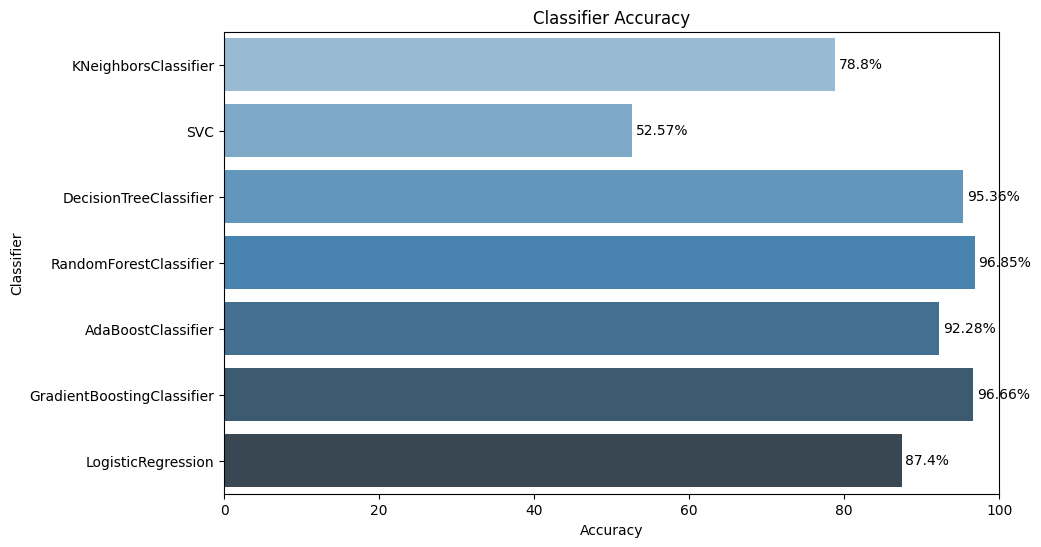

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

classifiers = [
    KNeighborsClassifier(3),
    SVC(probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    LogisticRegression()
]

sss = StratifiedShuffleSplit(n_splits=10, test_size=0.1, random_state=0)

score_dict = {}

for train_index, test_index in sss.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    for clf in classifiers:
        name = clf.__class__.__name__
        clf.fit(X_train, y_train)
        train_predictions = clf.predict(X_test)
        score = accuracy_score(y_test, train_predictions)

        if name in score_dict:
            score_dict[name].append(score)
        else:
            score_dict[name] = [score]

log_data = []
for clf in score_dict:
    avg_score = sum(score_dict[clf]) / len(score_dict[clf]) * 100  
    log_data.append([clf, round(avg_score, 2)]) 

log = pd.DataFrame(log_data, columns=["Classifier", "Accuracy"])


plt.figure(figsize=(10, 6))
sns.barplot(data=log, x='Accuracy', y='Classifier', palette="Blues_d")

for index, value in enumerate(log["Accuracy"]):
    plt.text(value + 0.5, index, f"{value}%", va='center', fontsize=10)

plt.xlabel('Accuracy')
plt.title('Classifier Accuracy')
plt.xlim(0, 100)
plt.show()

In [52]:
from sklearn.model_selection import GridSearchCV

X_train, X_test = None, None
y_train, y_test = None, None

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in sss.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

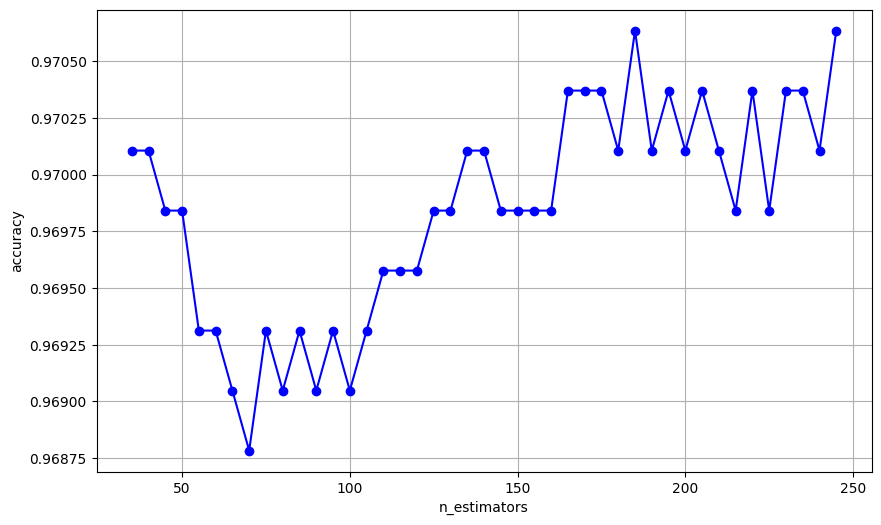

In [53]:
# find optimal n_estimators
preds = {}
for n_est in range(35, 250, 5):
    model = RandomForestClassifier(n_estimators=n_est, random_state=17, min_samples_split=4, max_features=None, criterion='entropy')
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, pred)

    preds[n_est] = accuracy

plt.figure(figsize=(10, 6))
plt.plot(list(preds.keys()), list(preds.values()), marker='o', linestyle='-', color='blue')
plt.xlabel('n_estimators')
plt.ylabel('accuracy')
plt.grid(True)
plt.show()

In [54]:
sorted_preds = sorted(preds.items(), key=lambda x: x[1], reverse=True)
print(sorted_preds)

[(185, 0.9706349206349206), (245, 0.9706349206349206), (165, 0.9703703703703703), (170, 0.9703703703703703), (175, 0.9703703703703703), (195, 0.9703703703703703), (205, 0.9703703703703703), (220, 0.9703703703703703), (230, 0.9703703703703703), (235, 0.9703703703703703), (35, 0.9701058201058201), (40, 0.9701058201058201), (135, 0.9701058201058201), (140, 0.9701058201058201), (180, 0.9701058201058201), (190, 0.9701058201058201), (200, 0.9701058201058201), (210, 0.9701058201058201), (240, 0.9701058201058201), (45, 0.9698412698412698), (50, 0.9698412698412698), (125, 0.9698412698412698), (130, 0.9698412698412698), (145, 0.9698412698412698), (150, 0.9698412698412698), (155, 0.9698412698412698), (160, 0.9698412698412698), (215, 0.9698412698412698), (225, 0.9698412698412698), (110, 0.9695767195767195), (115, 0.9695767195767195), (120, 0.9695767195767195), (55, 0.9693121693121693), (60, 0.9693121693121693), (75, 0.9693121693121693), (85, 0.9693121693121693), (95, 0.9693121693121693), (105, 0.9

In [55]:
# RF hyperparams searching
rf_model = RandomForestClassifier(random_state=17)

param_grid_rf = {
    'n_estimators': [185],
    'max_depth': [11],
    'min_samples_split': [4],
    'min_samples_leaf': [1],
    'max_features': [None],
    'criterion': ['entropy'],
    'bootstrap': [True]
}

grid_rf = GridSearchCV(rf_model, param_grid_rf, cv=3, scoring='accuracy', refit=True)
grid_rf.fit(X_train, y_train)

rf_pred = grid_rf.predict(X_test)
rf_acc = accuracy_score(y_test, rf_pred)
print(f'\nRF best params: {grid_rf.best_params_}\nAccuracy: {rf_acc}')


RF best params: {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 11, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 185}
Accuracy: 0.9703703703703703


In [56]:
# GB hyperparams searching
gb_model = GradientBoostingClassifier(random_state=17)

param_grid_gb = {
    'n_estimators': [185],
    'learning_rate': [0.6],
    'max_depth': [11],
    'min_samples_split': [4],
    'max_features': [None]
}

grid_gb = GridSearchCV(gb_model, param_grid_gb, cv=3, scoring='accuracy', refit=True)
grid_gb.fit(X_train, y_train)

gb_pred = grid_gb.predict(X_test)
gb_acc = accuracy_score(y_test, gb_pred)
print(f'\nGB best params: {grid_gb.best_params_}\nAccuracy: {gb_acc}')


GB best params: {'learning_rate': 0.6, 'max_depth': 11, 'max_features': None, 'min_samples_split': 4, 'n_estimators': 185}
Accuracy: 0.9706349206349206


In [59]:
# RF
rf_model = RandomForestClassifier(n_estimators=185, criterion='entropy', max_depth=11, random_state=17, min_samples_split=4, max_features=None)

rf_model.fit(X_train, y_train)
pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, pred)
print(f'Accuracy: {rf_accuracy}')

Accuracy: 0.9703703703703703


In [60]:
# GB
gb_model = GradientBoostingClassifier(n_estimators=185, learning_rate=0.6, max_depth=11, random_state=17, min_samples_split=4, max_features=None)

gb_model.fit(X_train, y_train)
pred = gb_model.predict(X_test)
gb_accuracy = accuracy_score(y_test, pred)
print(f'Accuracy: {gb_accuracy}')

Accuracy: 0.9706349206349206


In [ ]:
import pickle
import json
from app.settings.constants import SAVED_ESTIMATOR

with open('settings/specifications.json') as f:
    specifications = json.load(f)

raw_train = pd.read_csv(TRAIN_CSV)
x_columns = specifications['description']['X']
y_column = specifications['description']['y']

X_raw = raw_train[x_columns]

loader = DataLoader()
loader.fit(X_raw)
X = loader.load_data()
y = raw_train['class']

gb_model = GradientBoostingClassifier(n_estimators=185, learning_rate=0.6, max_depth=11, random_state=17, min_samples_split=4, max_features=None)
gb_model.fit(X_train, y_train)
with open(SAVED_ESTIMATOR, 'wb') as f:
    pickle.dump(gb_model, f)